In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from matplotlib.lines import Line2D

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

In [3]:
#Creating a dataframe to store the data
weatherData = pd.DataFrame({'City': cities})

# Perform API Calls

In [4]:
#Intializing the start of the API call
print("Beginnign Data Retrieval")

#Setting counter
recordNumber = 1
setNumber = 1

#Running a loop over cities list
for index, row in weatherData.iterrows():
    
    #Getting the city name
    cityName = row['City']
    
    #Generating the URL
    url = f'http://api.openweathermap.org/data/2.5/weather?q={cityName}&APPID={api_key}&units=imperial'
    
    #Checking for any missing data
    try:
        #Making the API call
        data = requests.get(url).json()
        
        print(f'Processing Record {recordNumber} of Set {setNumber} | {cityName}')
        
        #Storing data directly in the dataframe
        weatherData.loc[index, 'Cloudiness'] = data['clouds']['all']
        weatherData.loc[index, 'Country'] = data['sys']['country']
        weatherData.loc[index, 'Date'] = data['dt']
        weatherData.loc[index, 'Humidity'] = data['main']['humidity']
        weatherData.loc[index, 'Lat'] = data['coord']['lat']
        weatherData.loc[index, 'Lng'] = data['coord']['lon']
        weatherData.loc[index, 'Max Temp'] = data['main']['temp_max']
        weatherData.loc[index, 'Wind Speed'] = data['wind']['speed']
        
        if(recordNumber == 50):
            recordNumber = 1
            setNumber += 1
        else:
            recordNumber += 1
    except:
        print('City not found. Skipping...')

Beginnign Data Retrieval
Processing Record 1 of Set 1 | dyatkovo
Processing Record 2 of Set 1 | cabo san lucas
Processing Record 3 of Set 1 | marcona
City not found. Skipping...
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | fortuna
Processing Record 5 of Set 1 | batagay
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | whyalla
Processing Record 10 of Set 1 | torbay
Processing Record 11 of Set 1 | sept-iles
Processing Record 12 of Set 1 | sitka
Processing Record 13 of Set 1 | pampas
Processing Record 14 of Set 1 | port lincoln
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | marsh harbour
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | flinders
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | talnakh
Processing Record 22 of Set 1 | busselton
Processi

Processing Record 20 of Set 4 | zhigansk
Processing Record 21 of Set 4 | kuala terengganu
Processing Record 22 of Set 4 | wake forest
Processing Record 23 of Set 4 | bilma
Processing Record 24 of Set 4 | cheuskiny
City not found. Skipping...
Processing Record 24 of Set 4 | lavrentiya
Processing Record 25 of Set 4 | aykhal
Processing Record 26 of Set 4 | dicabisagan
Processing Record 27 of Set 4 | chuy
Processing Record 28 of Set 4 | saskylakh
Processing Record 29 of Set 4 | sarkand
Processing Record 30 of Set 4 | tuatapere
Processing Record 31 of Set 4 | sangar
Processing Record 32 of Set 4 | parksville
Processing Record 33 of Set 4 | kadyy
Processing Record 34 of Set 4 | clyde river
Processing Record 35 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 36 of Set 4 | saint-louis
Processing Record 37 of Set 4 | vieksniai
Processing Record 38 of Set 4 | ugoofaaru
Processing Record 39 of Set 4 | salta
Processing Record 40 of Set 4 | namatanai
Processing Record 41 of Set 4 | digha
Pro

Processing Record 38 of Set 7 | saleaula
City not found. Skipping...
Processing Record 38 of Set 7 | virginia beach
Processing Record 39 of Set 7 | gorontalo
Processing Record 40 of Set 7 | jijiga
Processing Record 41 of Set 7 | mikuni
Processing Record 42 of Set 7 | halalo
City not found. Skipping...
Processing Record 42 of Set 7 | bemidji
Processing Record 43 of Set 7 | podlesnoye
Processing Record 44 of Set 7 | tadine
Processing Record 45 of Set 7 | locri
Processing Record 46 of Set 7 | piryion
City not found. Skipping...
Processing Record 46 of Set 7 | brae
Processing Record 47 of Set 7 | galesong
Processing Record 48 of Set 7 | srednekolymsk
Processing Record 49 of Set 7 | ngunguru
Processing Record 50 of Set 7 | barela
Processing Record 1 of Set 8 | contamana
Processing Record 2 of Set 8 | salalah
Processing Record 3 of Set 8 | encheng
Processing Record 4 of Set 8 | roma
Processing Record 5 of Set 8 | nhulunbuy
Processing Record 6 of Set 8 | padang
Processing Record 7 of Set 8 | 

Processing Record 49 of Set 10 | chimbote
Processing Record 50 of Set 10 | gluckstadt
Processing Record 1 of Set 11 | kuldiga
Processing Record 2 of Set 11 | tugdan
Processing Record 3 of Set 11 | ayagoz
Processing Record 4 of Set 11 | ballina
Processing Record 5 of Set 11 | cockburn harbour
City not found. Skipping...
Processing Record 5 of Set 11 | gravelbourg
Processing Record 6 of Set 11 | entebbe
Processing Record 7 of Set 11 | nokaneng
Processing Record 8 of Set 11 | korhogo
Processing Record 9 of Set 11 | zuwarah
Processing Record 10 of Set 11 | anadyr
Processing Record 11 of Set 11 | tlapa
City not found. Skipping...
Processing Record 11 of Set 11 | kurilsk
Processing Record 12 of Set 11 | parati
Processing Record 13 of Set 11 | sorong
Processing Record 14 of Set 11 | hervey bay
Processing Record 15 of Set 11 | coquimbo
Processing Record 16 of Set 11 | salina
Processing Record 17 of Set 11 | puerto princesa
Processing Record 18 of Set 11 | karaul
City not found. Skipping...
Pro

In [5]:
weatherData = weatherData.dropna(how='any')
weatherData.count()

City          530
Cloudiness    530
Country       530
Date          530
Humidity      530
Lat           530
Lng           530
Max Temp      530
Wind Speed    530
dtype: int64

In [6]:
#Store dataframe to a csv file
export_csv = weatherData.to_csv(output_data_file)

In [7]:
weatherData.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,dyatkovo,13.0,RU,1.573696e+09,86.0,53.60,34.34,37.65,9.69
1,cabo san lucas,20.0,MX,1.573695e+09,64.0,22.89,-109.91,77.00,4.70
3,hermanus,0.0,ZA,1.573695e+09,85.0,-34.42,19.24,63.10,20.47
4,fortuna,40.0,US,1.573696e+09,100.0,40.60,-124.16,48.20,9.17
5,batagay,50.0,RU,1.573695e+09,98.0,67.65,134.64,-19.61,0.65


In [8]:
#Getting today's Date https://www.cyberciti.biz/faq/howto-get-current-date-time-in-python/
date = (time.strftime("%m/%d/%Y"))
date

'11/13/2019'

# Latitude vs. Temperature Plot

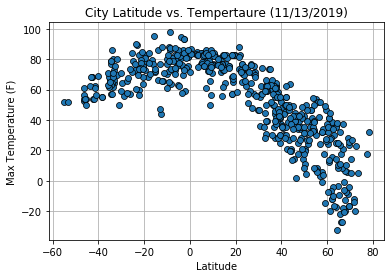

In [9]:
fig, temp = plt.subplots()
temp.plot(weatherData['Lat'], weatherData['Max Temp'], linestyle='none', marker = 'o', markeredgewidth =0.75, markeredgecolor='black')
temp.set_title(f"City Latitude vs. Tempertaure ({date})")
temp.grid()
temp.set_xlabel('Latitude')
temp.set_ylabel('Max Temperature (F)')
plt.show()

# Latitude vs. Humidity Plot

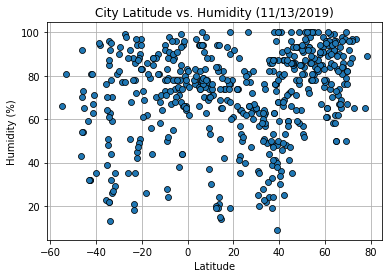

In [10]:
fig, humi = plt.subplots()
humi.plot(weatherData['Lat'], weatherData['Humidity'], linestyle='none', marker = 'o', markeredgewidth =0.75, markeredgecolor='black')
humi.set_title(f"City Latitude vs. Humidity ({date})")
humi.grid()
humi.set_xlabel('Latitude')
humi.set_ylabel('Humidity (%)')
plt.show()

# Latitude vs. Cloudiness

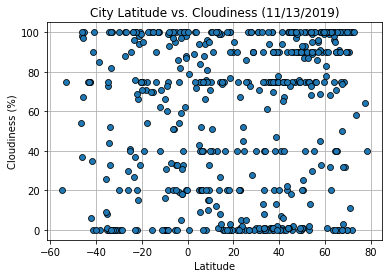

In [11]:
fig, clou = plt.subplots()
clou.plot(weatherData['Lat'], weatherData['Cloudiness'], linestyle='none', marker = 'o', markeredgewidth =0.75, markeredgecolor='black')
clou.set_title(f"City Latitude vs. Cloudiness ({date})")
clou.grid()
clou.set_xlabel('Latitude')
clou.set_ylabel('Cloudiness (%)')
plt.show()

# Latitude vs. Wind Speed

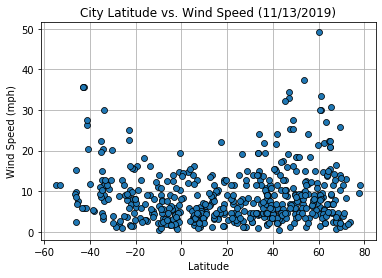

In [12]:
fig, wind = plt.subplots()
wind.plot(weatherData['Lat'], weatherData['Wind Speed'], linestyle='none', marker = 'o', markeredgewidth =0.75, markeredgecolor='black')
wind.set_title(f"City Latitude vs. Wind Speed ({date})")
wind.grid()
wind.set_xlabel('Latitude')
wind.set_ylabel('Wind Speed (mph)')
plt.show()